# Chapter 2: Distributions
---

## 2.2 - Representing histograms

In [1]:
import thinkstats2

In [2]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [3]:
hist.Freq(2)

2

In [4]:
hist[2]

2

In [5]:
hist.Freq(4)

0

In [6]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [7]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [8]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


## 2.3 - Plotting histograms

In [9]:
import thinkplot

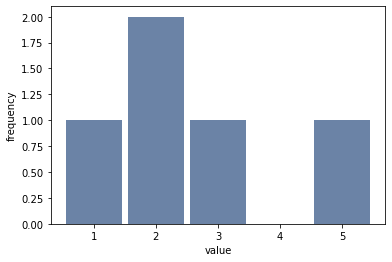

<Figure size 576x432 with 0 Axes>

In [10]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

## 2.4 - NSFG variables

In [11]:
import nsfg

In [12]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

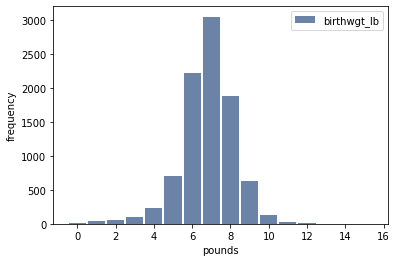

<Figure size 576x432 with 0 Axes>

In [13]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

## 2.5 - Outliers

In [14]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')

In [15]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [16]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


## 2.6 - First babies

In [17]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [18]:
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

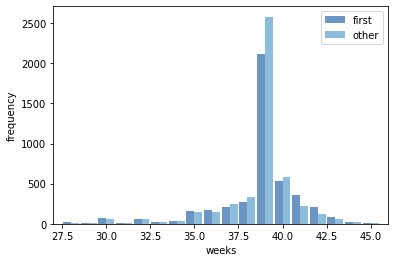

<Figure size 576x432 with 0 Axes>

In [19]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

## 2.8 - Variance

In [20]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print('mean: ', mean)
print('variance: ', var)
print('standard deviation: ', std)

mean:  38.56055968517709
variance:  7.302662067826851
standard deviation:  2.702343810070593


## 2.9 - Effect size

In [21]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

---
## 2.11 - Exercises
---

### Exercise 2.3

In [115]:
import numpy as np
from collections import Counter

In [116]:
def Mode(histogram):
    hist_dct = histogram.d
    
    mode = Counter(hist_dct).most_common(1)[0][0]
    return mode

In [117]:
Mode(thinkstats2.Hist([100, 22, 22, 22, 7, 7, 6]))

22

In [118]:
def AllModes(histogram):
    hist_dct = histogram.d
    
    modes = Counter(hist_dct).most_common(len(hist_dct))
    return modes

In [119]:
AllModes(thinkstats2.Hist([100, 22, 22, 22, 7, 7, 6]))

[(22, 3), (7, 2), (100, 1), (6, 1)]